## Wordcloud and Sentiment Analysis from Reviews

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
beer= pd.read_csv('/home/ashwani/Desktop/Python/Text_Mining/dataset/beer_review_data_sample.csv')

In [3]:
beer.head()

,beer_brewerid,review_time,review_overall,review_text,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,1234817823,1.5,A lot of foam. But a lot.\tIn the smell some b...,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,1235915097,3.0,"Dark red color, light beige foam, average.\tIn...",2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,1235916604,3.0,"Almost totally black. Beige foam, quite compac...",2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,1234725145,3.0,"Golden yellow color. White, compact foam, quit...",3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,1293735206,4.0,"According to the website, the style for the Ca...",4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
beer.shape
beer.dtypes

(10000, 13)

beer_brewerid           int64
review_time             int64
review_overall        float64
review_text            object
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [5]:
beer.review_text=beer.review_text.astype('str')

In [6]:
beer.columns

Index(['beer_brewerid', 'review_time', 'review_overall', 'review_text',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
beer.isnull().sum()

beer_brewerid           0
review_time             0
review_overall          0
review_text             0
review_aroma            0
review_appearance       0
review_profilename      1
beer_style              0
review_palate           0
review_taste            0
beer_name               0
beer_abv              529
beer_beerid             0
dtype: int64

In [8]:
import nltk
import re
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
reviews = beer['review_text'].tolist()

In [10]:
reviews=[re.sub("(\t)"," ",rev) for rev in reviews] 

In [11]:
review_all_text = ""
for rev in reviews:
    review_all_text = review_all_text + rev

In [12]:
wc = WordCloud(background_color = 'white',max_words = 200,
               scale=1.5,max_font_size=40,min_font_size=1)
wc.generate(review_all_text)

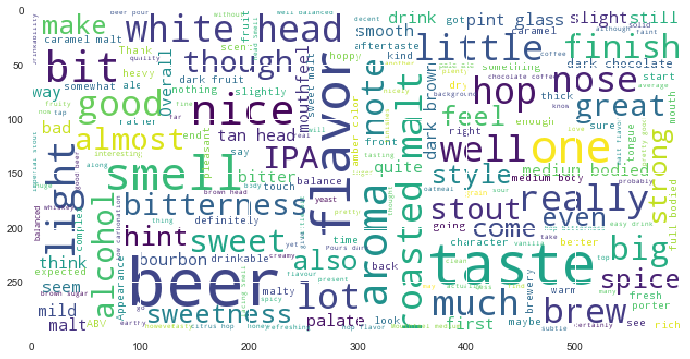

In [13]:
plt.figure(figsize=(12,6))
plt.imshow(wc)

### Outcome from Wordcloud 
#### The frequent  words used in reviews are beer, flavour, taste and smell

In [14]:
from nltk import word_tokenize
tokens_only=[word_tokenize(w) for w in reviews ]

In [15]:
from nltk.corpus import stopwords
import re
from string import *
from nltk.stem.porter import PorterStemmer

In [16]:
p_stemmer = PorterStemmer()

In [17]:
for outer in range(len(tokens_only)):
    for inner in range(len(tokens_only[outer])):
        tokens_only[outer][inner] = p_stemmer.stem(tokens_only[outer][inner]) 

In [18]:
len(tokens_only)

10000

In [19]:
from textblob import TextBlob

In [20]:
TextBlob(reviews[0]).sentiment.polarity

-0.09090909090909091

In [21]:
beer.insert(4,'polarity',np.NaN)
beer.head()

,beer_brewerid,review_time,review_overall,review_text,polarity,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,1234817823,1.5,A lot of foam. But a lot.\tIn the smell some b...,NaN,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,1235915097,3.0,"Dark red color, light beige foam, average.\tIn...",NaN,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,1235916604,3.0,"Almost totally black. Beige foam, quite compac...",NaN,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,1234725145,3.0,"Golden yellow color. White, compact foam, quit...",NaN,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,1293735206,4.0,"According to the website, the style for the Ca...",NaN,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [22]:
polarity= [ TextBlob(reviews[i]).sentiment.polarity for i in range(10000) ]

In [23]:
polarity

[-0.09090909090909091,
 0.1474358974358974,
 0.3383333333333333,
 0.36274509803921556,
 0.16714285714285712,
 0.20996031746031749,
 0.34717948717948716,
 0.19746031746031745,
 0.25866300366300365,
 0.20790229885057473,
 0.19287840136054418,
 0.20515873015873018,
 0.24583333333333335,
 0.18467230685980682,
 -0.031818181818181794,
 0.16765010351966877,
 0.25324283559577676,
 0.09898148148148146,
 0.025694444444444454,
 0.364791280148423,
 0.1863888888888889,
 0.30340909090909096,
 0.2054271708683474,
 0.4856026785714286,
 0.1648809523809524,
 0.2338888888888889,
 0.3247395833333333,
 0.2749707602339181,
 0.11698232323232323,
 0.19166666666666665,
 0.4211333333333333,
 0.21694444444444444,
 0.26004629629629633,
 0.17609649122807022,
 0.20595238095238097,
 0.14785247432306256,
 0.14444444444444443,
 0.23161764705882354,
 0.38333333333333336,
 0.415625,
 0.09102564102564105,
 0.11666666666666664,
 0.3212121212121212,
 0.08277777777777778,
 0.20061728395061726,
 0.32462121212121214,
 0.24509

In [24]:
beer.polarity=polarity

In [25]:
beer.head()

,beer_brewerid,review_time,review_overall,review_text,polarity,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,1234817823,1.5,A lot of foam. But a lot.\tIn the smell some b...,-0.090909,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,1235915097,3.0,"Dark red color, light beige foam, average.\tIn...",0.147436,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,1235916604,3.0,"Almost totally black. Beige foam, quite compac...",0.338333,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,1234725145,3.0,"Golden yellow color. White, compact foam, quit...",0.362745,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,1293735206,4.0,"According to the website, the style for the Ca...",0.167143,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [26]:
beer.insert(5,'sentiment',np.NaN)

In [27]:
import rpy2 
import rpy2.robjects
%load_ext rpy2.ipython

In [28]:
%%R -i beer
flag = ifelse(beer$polarity<0,'Neg', ifelse(beer$polarity==0,'Neut','Pos'))

In [29]:
%R -o flag

In [30]:
beer["sentiment"]=flag

In [31]:
beer_review= beer[['review_overall','review_text', 'polarity', 'sentiment']] 

In [32]:
beer_review.head()

,review_overall,review_text,polarity,sentiment
0,1.5,A lot of foam. But a lot.\tIn the smell some b...,-0.090909,Neg
1,3.0,"Dark red color, light beige foam, average.\tIn...",0.147436,Pos
2,3.0,"Almost totally black. Beige foam, quite compac...",0.338333,Pos
3,3.0,"Golden yellow color. White, compact foam, quit...",0.362745,Pos
4,4.0,"According to the website, the style for the Ca...",0.167143,Pos


In [33]:
beer_review.sentiment.value_counts()

Pos     9196
Neg      801
Neut       3
Name: sentiment, dtype: int64

In [34]:
pos=len(beer_review[beer_review.sentiment=='Pos'])
Neg=len(beer_review[beer_review.sentiment=='Neg'])
Neut=len(beer_review[beer_review.sentiment=='Neut'])

In [35]:
print("Positive Review percentage: {} %".format(100*pos/len(beer_review)))
print("Negative Review percentage: {} %".format(100*Neg/len(beer_review)))
print("Neutral Review percentage: {} %".format(100*Neut/len(beer_review)))

Positive Review percentage: 91.96 %
Negative Review percentage: 8.01 %
Neutral Review percentage: 0.03 %
